# Loading and splitting the data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


## Visualizing 10 pictures from each class

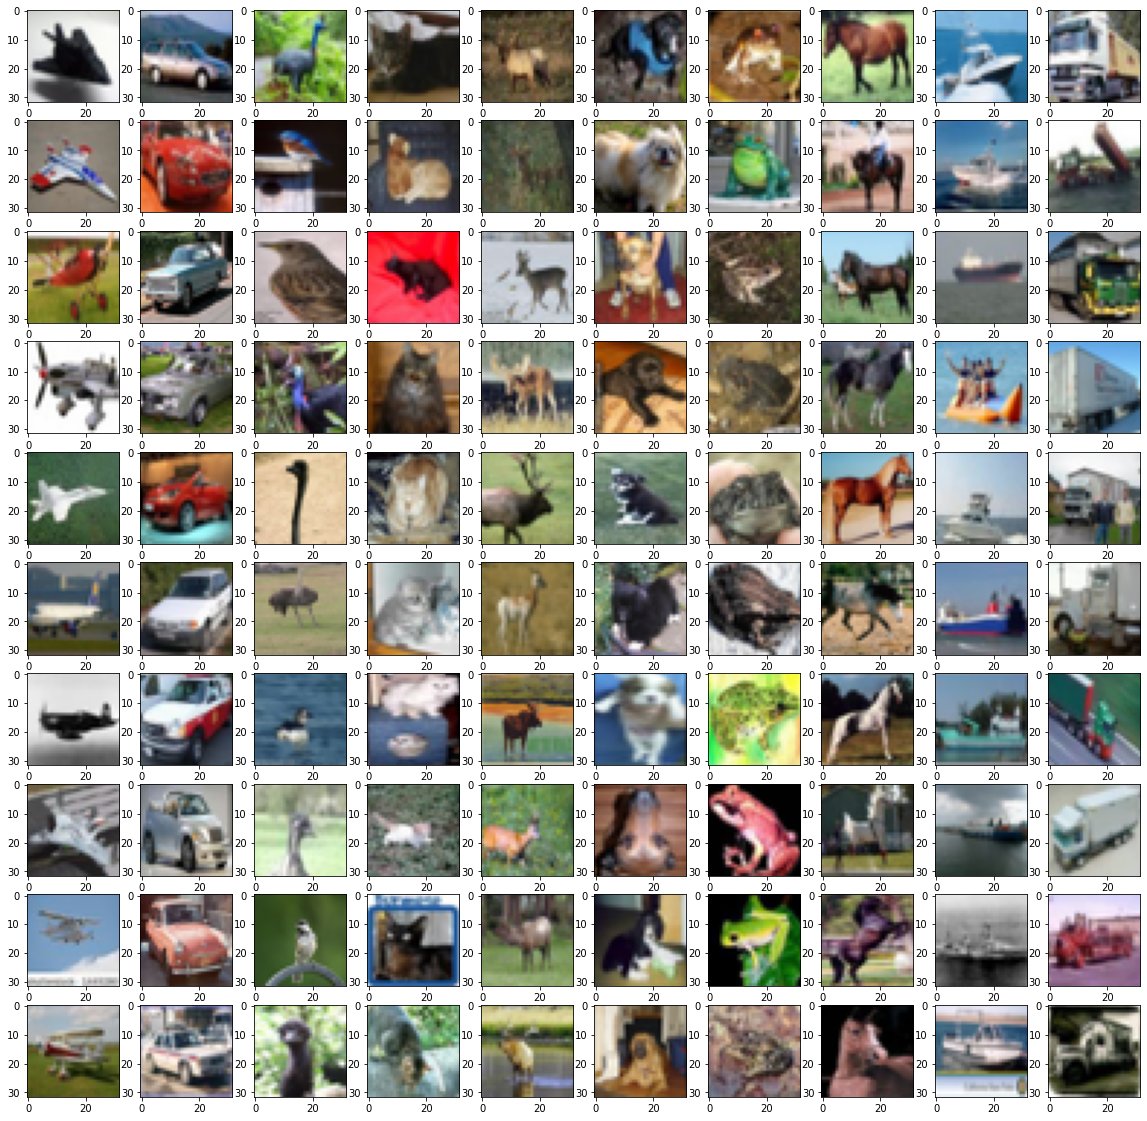

In [ ]:
fig=plt.figure(figsize=(20, 20))
labels = np.zeros(10,)
i=0
while True:
  label = train_labels[i][0]
  if labels[label] <10:
    ax = plt.subplot(10, 10, int((label+labels[label]*10)+1))
    ax.imshow(train_images[i])
    labels[label] = labels[label] + 1
  if labels.min() == 10:
    break
  i += 1

<BarContainer object of 10 artists>

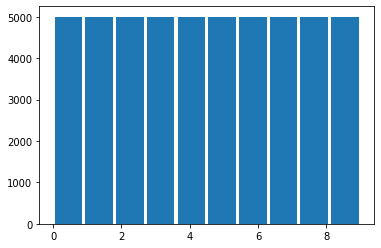

In [ ]:
plt.hist(train_labels, rwidth = 0.9)[-1]

Histogram shows 5000 images in each class in the training set

<BarContainer object of 10 artists>

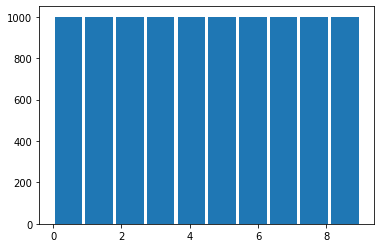

In [ ]:
plt.hist(test_labels, rwidth = 0.9)[-1]

Histogram shows 1000 images in each class in the test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, y_train, x_val, y_val = train_test_split(train_images,train_labels,test_size=0.2,shuffle=True)

In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
len(train_labels)

50000

In [ ]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
test_images.shape

(10000, 32, 32, 3)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels.shape

(10000, 1)

In [ ]:
test_labels

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

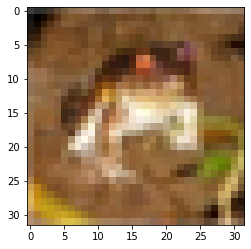

In [ ]:
img = train_images[0]
plt.imshow(img)


#### Change images' shape into a vector instead of a 3D tensor and normalize by dividing by 255 which is the highest pixel value for each color

In [ ]:
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype('float32') / 255

In [ ]:
train_images.shape

(50000, 3072)

### Perform categorical encoding on the labels

In [ ]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

### Creating a neural network model

In [ ]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', name='Layer_1', input_shape=(32 * 32 * 3,)))
network.add(layers.Dense(256, activation='relu', name='Layer_2'))
network.add(layers.Dense(128, activation='relu', name='Layer_3'))
network.add(layers.Dense(10, activation='softmax'))

In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 512)               1573376   
                                                                 
 Layer_2 (Dense)             (None, 256)               131328    
                                                                 
 Layer_3 (Dense)             (None, 128)               32896     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


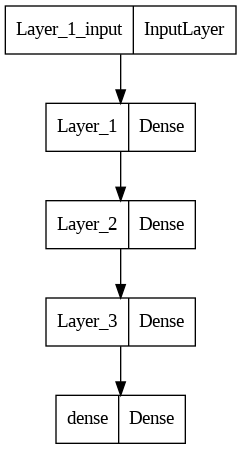

In [ ]:
from keras.utils import plot_model
plot_model(network)

In [ ]:
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

## Trying different optimizers and batch sizes in training

rmsprop batch_size=128

In [ ]:
network.fit(train_images, train_labels, epochs=7, batch_size=128)

Epoch 1/7
391/391 [==============================] - 9s 20ms/step - loss: 2.0542 - accuracy: 0.2629
Epoch 2/7
391/391 [==============================] - 8s 22ms/step - loss: 1.7881 - accuracy: 0.3548
Epoch 3/7
391/391 [==============================] - 8s 21ms/step - loss: 1.6970 - accuracy: 0.3930
Epoch 4/7
391/391 [==============================] - 8s 20ms/step - loss: 1.6289 - accuracy: 0.4149
Epoch 5/7
391/391 [==============================] - 8s 21ms/step - loss: 1.5758 - accuracy: 0.4328
Epoch 6/7
391/391 [==============================] - 8s 21ms/step - loss: 1.5382 - accuracy: 0.4516
Epoch 7/7
391/391 [==============================] - 8s 21ms/step - loss: 1.5004 - accuracy: 0.4637


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 1.5920 - accuracy: 0.4449


rmsprop batch_size=64

In [ ]:
network.fit(train_images, train_labels, epochs=7, batch_size=64)

Epoch 1/7
782/782 [==============================] - 12s 15ms/step - loss: 1.9676 - accuracy: 0.2895
Epoch 2/7
782/782 [==============================] - 11s 15ms/step - loss: 1.7356 - accuracy: 0.3755
Epoch 3/7
782/782 [==============================] - 11s 15ms/step - loss: 1.6433 - accuracy: 0.4119
Epoch 4/7
782/782 [==============================] - 12s 15ms/step - loss: 1.5844 - accuracy: 0.4323
Epoch 5/7
782/782 [==============================] - 11s 15ms/step - loss: 1.5397 - accuracy: 0.4513
Epoch 6/7
782/782 [==============================] - 11s 14ms/step - loss: 1.5074 - accuracy: 0.4635
Epoch 7/7
782/782 [==============================] - 11s 14ms/step - loss: 1.4773 - accuracy: 0.4763


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 1.7414 - accuracy: 0.4153


adam batch_size=64

In [ ]:
network.fit(train_images, train_labels, epochs=7, batch_size=64)

Epoch 1/7
782/782 [==============================] - 13s 16ms/step - loss: 1.8801 - accuracy: 0.3168
Epoch 2/7
782/782 [==============================] - 12s 16ms/step - loss: 1.6799 - accuracy: 0.3947
Epoch 3/7
782/782 [==============================] - 12s 16ms/step - loss: 1.5868 - accuracy: 0.4294
Epoch 4/7
782/782 [==============================] - 13s 17ms/step - loss: 1.5248 - accuracy: 0.4520
Epoch 5/7
782/782 [==============================] - 12s 15ms/step - loss: 1.4848 - accuracy: 0.4692
Epoch 6/7
782/782 [==============================] - 12s 16ms/step - loss: 1.4476 - accuracy: 0.4813
Epoch 7/7
782/782 [==============================] - 13s 16ms/step - loss: 1.4191 - accuracy: 0.4908


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 1.4709 - accuracy: 0.4741


adam batch_size=128 (Best Accuracy)

In [ ]:
history = network.fit(train_images, train_labels, validation_split = 0.2, epochs=7, batch_size=128)

Epoch 1/7
313/313 [==============================] - 7s 7ms/step - loss: 1.9204 - accuracy: 0.3017 - val_loss: 1.7669 - val_accuracy: 0.3615
Epoch 2/7
313/313 [==============================] - 2s 5ms/step - loss: 1.7164 - accuracy: 0.3830 - val_loss: 1.6757 - val_accuracy: 0.4083
Epoch 3/7
313/313 [==============================] - 2s 5ms/step - loss: 1.6302 - accuracy: 0.4133 - val_loss: 1.6175 - val_accuracy: 0.4203
Epoch 4/7
313/313 [==============================] - 2s 5ms/step - loss: 1.5691 - accuracy: 0.4364 - val_loss: 1.6160 - val_accuracy: 0.4221
Epoch 5/7
313/313 [==============================] - 2s 7ms/step - loss: 1.5222 - accuracy: 0.4577 - val_loss: 1.5919 - val_accuracy: 0.4348
Epoch 6/7
313/313 [==============================] - 2s 6ms/step - loss: 1.4836 - accuracy: 0.4717 - val_loss: 1.5850 - val_accuracy: 0.4399
Epoch 7/7
313/313 [==============================] - 2s 5ms/step - loss: 1.4503 - accuracy: 0.4827 - val_loss: 1.4965 - val_accuracy: 0.4666


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.4736 - accuracy: 0.4771


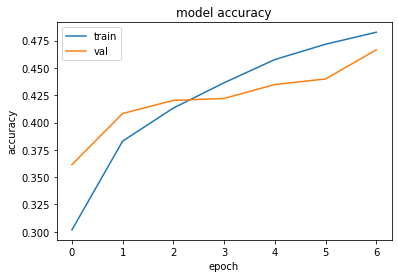

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

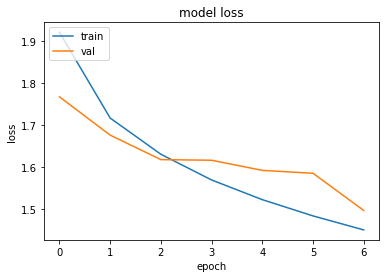

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Making a prediciton

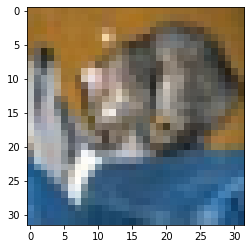

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
img = test_images[0]
plt.imshow(np.reshape(img, (32, 32, 3)))


In [ ]:
img.shape

(3072,)

In [ ]:
network.predict(np.reshape(img, (1,3072)))

1/1 [==============================] - 0s 89ms/step


array([[0.02911766, 0.0218812 , 0.06941613, 0.29711518, 0.08491196,
        0.42056644, 0.02840303, 0.01177571, 0.0288429 , 0.0079698 ]],
      dtype=float32)

In [ ]:
np.argmax(network.predict(np.reshape(img, (1,3072))))

1/1 [==============================] - 0s 21ms/step


5

In [ ]:
print('test_acc:', test_acc)

test_acc: 0.4771000146865845
